#[Assignment 9] Dominant Colors - Clustering

In this assingment you will find dominant color of an image comparing K-Means and SOM

##Step 0: Setting up the Modules

In [1]:
#Run this code to install minisom
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=70774d3c3055290d4822097d19c7c807f12eae2bd768016f9d309bf9633fa39a
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [2]:
#Import modules needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from minisom import MiniSom
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Step 1: Load an image

Download the `dominant-color.jpg` from canvas and upload it to Colab

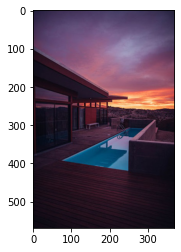

In [4]:
#run the code below to load the image and show it.
img = plt.imread('dominant-colors.jpg')
plt.imshow(img)

## Step 2: Pre-Processing the image

The dimension of the image you loaded has the form: `Height x Width x 3`

1.   Re-shape the image as `m x 3` and save it `img_reshaped`
2.   Using `StandardScalar()`, normalize features (Colors) and save the normalized array as `img_reshaped_n`. Do not change the name of `stdScaler`

In [5]:
from sklearn.preprocessing import StandardScaler
### BEGIN SOLUTION

img_reshaped = 


stdScaler = StandardScaler()


img_reshaped_n = 


### END SOLUTION
print('Original img shape: ', img.shape)
print('Reshaped img shape: ', img_reshaped.shape)
print('Reshaped and normalized img shape: ', img_reshaped_n.shape)

Original img shape:  (569, 370, 3)
Reshaped img shape:  (210530, 3)
Reshaped and normalized img shape:  (210530, 3)


## Step 3: Implementing K-Means

Iterate through K= 2,3,4,..., 8 and Implement K-Means using the normalized features `img_shaped_n`  

*   Form a list called `Inertia_list` and for every value of K (in every iteration) append the Kmeans Inertia to the list
*   Form a list called `Silhouette_list` and for every value of K (in every iteration) append the silhouette score to the list

At the end of the following code block, you should have two lists each with **7 values** corresponding to K=2,3,....8.

<font color=red>**Silhouette Implemenation Note:**</font> Calculating Silhouette coefficient is computationally extensive. Therefore, we will compute Silhouette coefficient on a random sub sample of our data instead of running it on all data. The parameter `sample_size` specify the number of samples we want to be used for computing the coefficient. If we do not provide this parameter, Colab will take a long time and it may not give us the coefficient. So use the Silhouette function with the following three parameters:

*  sample_size=35000 
*  random_state=10
*  n_jobs=-1

Basically, in this example we compute Silhouette for ~15% of data (we have ~210k total records) 



In [6]:
Inertia_list=[]
Silhouette_list=[]

### BEGIN SOLUTION






### END SOLUTION


Running the following code block will give you the trend of KMeans Error and Silhouette Score.

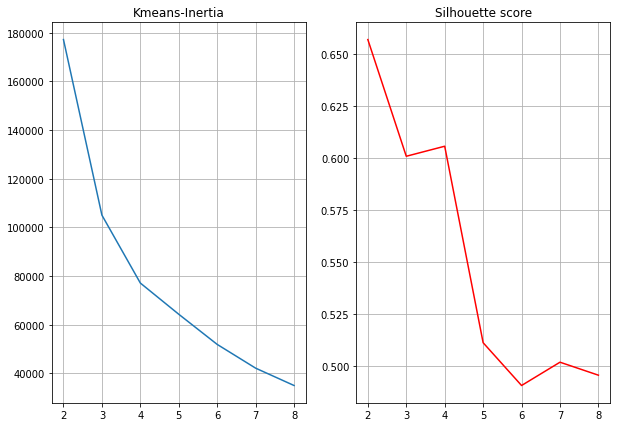

In [8]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot([i for i in range(2,9)],Inertia_list)
plt.title('Kmeans-Inertia')
plt.grid()
plt.subplot(1,2,2)
plt.plot([i for i in range(2,9)],Silhouette_list,color='red')
plt.title('Silhouette score')
plt.grid()

## Step 4: Selecting the best K

Based on the graphs above, select the best k, set the value of k in the following block to re-run the KMeans for the selected value of k

In [9]:
#Set the Value of K based on the graphs above
Best_K=

kmeans = KMeans(n_clusters=Best_K, init= "random")
kmeans.fit(img_reshaped_n)

KMeans(init='random', n_clusters=4)

## Step 5: Replace colors with KMeans centroids!



1.   Form a numpy array called `img_clustered_reshaped_n` which has the exact number of records as the `img_reshaped_n`, and replace the colors (values of the records) with the centroid color that the record belongs to. 
2.   Reverse the normalization that you did with `stdScaler` and modify `img_clustered_reshaped_n` to be `img_clustered_reshaped`
3.   Reshape the `img_clustered_reshaped` to have the shape of the original image `Height x Width x 3` and name it `img_clustered`





In [10]:
### BEGIN SOLUTION


img_clustered_reshaped_n=

img_clustered_reshaped=

img_clustered=



### END SOLUTION

If your code in the block above is written correclty, the modified image (with dominant colors) should show up after running the following block of code.

Text(0.5, 1.0, 'KMeans')

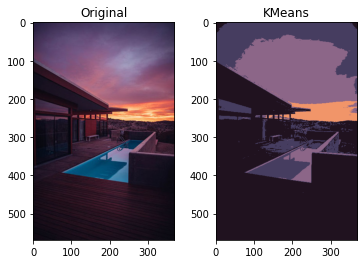

In [20]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(img_clustered.astype(int))
plt.title("KMeans")

Run the following code, should give us the centroids - Dominant colors!

In [13]:
centroids = stdScaler.inverse_transform(kmeans.cluster_centers_)
centroids

array([[ 32.42000908,  18.0101145 ,  31.27255908],
       [ 70.29428143,  61.86956522,  96.332667  ],
       [241.29095586, 149.85499594, 105.09301381],
       [140.75575373, 102.31395724, 136.1259697 ]])

## Step 6: Implementing SOM

Define a SOM with network of 5 by 5 perceptrons called `SOM_Model`. Train the defined model on `img_reshaped_n` till you achieve <font color=red> quantization error less than 0.35 </font>

You should only modify the following parameters:

*   sigma
*   learning_rate
*   number of iterations (you are **not** allowed to have a number of iteration larger than 150000)

In [14]:
### BEGIN SOLUTION

SOM_Model= 





### END SOLUTION


 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.32520599957174345


Run the following block of code to see the quantization error

In [15]:
SOM_Model.quantization_error(img_reshaped_n)

0.32520599957174345

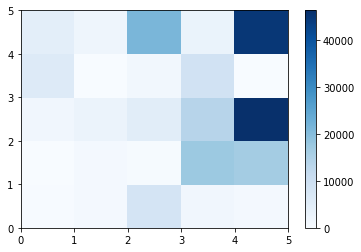

In [16]:
plt.pcolor(SOM_Model.activation_response(img_reshaped_n).T, cmap='Blues') 
plt.colorbar()
plt.show()

## Step 7: Color Quantization

1.   Quantize the colors in `img_reshaped_n` using the trained SOM model `SOM_Model` and call it `img_reshaped_n_qnt`
2.   Use the `stdScaler` to reverse the normalization and form an array called `img_reshaped_qnt`
2.   Reshape the `img_reshaped_qnt` to have the shape of the original image `Height x Width x 3` and call it `img_qnt`

In [17]:
### BEGIN SOLUTION


img_reshaped_n_qnt=

img_reshaped_qnt=

img_qnt=

### END SOLUTION


Run the following block of code to see the

the original image, 

1.   Orikginal image
2.   Image quantized using KMeans
3.   Image Quantized using SOM



Text(0.5, 1.0, 'SOM')

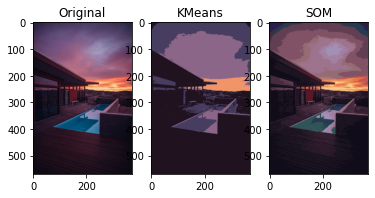

In [18]:
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(img_clustered.astype(int))
plt.title('KMeans')

plt.subplot(1,3,3)
plt.imshow(img_qnt.astype(int))
plt.title('SOM')


Run the following block of code to the dominant colors identified by KMeans and dominant colors identified by SOM

Text(0.5, 1.0, 'Dominant Colors - SOM')

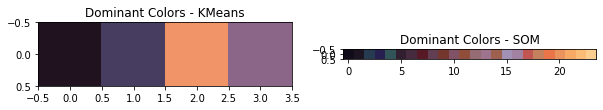

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(centroids.reshape(1,4,3).astype(int))
plt.title('Dominant Colors - KMeans')
plt.subplot(1,2,2)
plt.imshow(stdScaler.inverse_transform(np.unique(img_reshaped_n_qnt, axis=0)).reshape(1,24,3).astype(int))
plt.title('Dominant Colors - SOM')

Yes we used more colors for SOM but Dominant Colors found by KMeans are similar to some of the dominant colors of SOM!